## 📦 Seller Delivery Performance Analysis

In this section, we analyze how sellers perform in terms of delivery reliability.  
Key metrics include:
- **Average Delay vs Estimated Date** (`delay_vs_estimate`)
- **Late Delivery Rate** (`is_late`)
- **Fast Shipping Rate** (`is_fast_shipping`)

To ensure meaningful insights, we’ll filter sellers with at least **30 orders**.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv') 

df.columns


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_volume_cm3', 'delivery_time_days', 'delay_vs_estimate',
       'is_late', 'is_delivered', 'is_fast_shipping', 'price_per_cm3',
       'total_order_value', 'customer_wait_time',
       'avg_product_price_per_order', 'price_to_weight_ratio', 'freight_share',
       'product_density', 'num_items'],
      dtype='object')

In [3]:

seller_stats = df.groupby('seller_id').agg(
    total_orders=('order_id', 'nunique'),
    total_items=('order_item_id', 'count'),
    total_revenue=('price', 'sum'),
    total_freight=('freight_value', 'sum')
).reset_index()

top_sellers = seller_stats.sort_values(by='total_revenue', ascending=False).head(10)
top_sellers


,seller_id,total_orders,total_items,total_revenue,total_freight
825,4869f7a5dfa277a7dca6462dcf3b52b2,1124,1148,226987.93,20019.13
973,53243585a1d6dc2643021fd1853d8905,348,400,217940.44,12856.58
849,4a3ca9315b744ce9f8e9374361493884,1763,1940,195914.72,34198.40
2867,fa1c13f2614d7b5c4749cbc52fecda94,571,572,188641.64,9806.31
1463,7c67e1448b00f6e969d365cea6b010ab,944,1308,178681.57,48526.80
1487,7e93a43ef30c4f03f38b393420bc753a,319,322,165981.49,5992.06
2511,da8622b14eb17ae2831f4ac5b9dab84a,1311,1548,159816.87,24889.91
1433,7a67c85e85bb2ce8582c35f2203ad736,1145,1155,139658.69,20619.83
182,1025f0e2d44d7041d6cf58b6550e0bfa,910,1420,138208.56,33716.40
1740,955fee9216a65b617aa5c0531780ce60,1261,1472,131836.71,24769.77


C:\Users\vrush\AppData\Local\Temp\ipykernel_19848\1156963131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sellers, x='seller_id', y='total_revenue', palette='viridis')


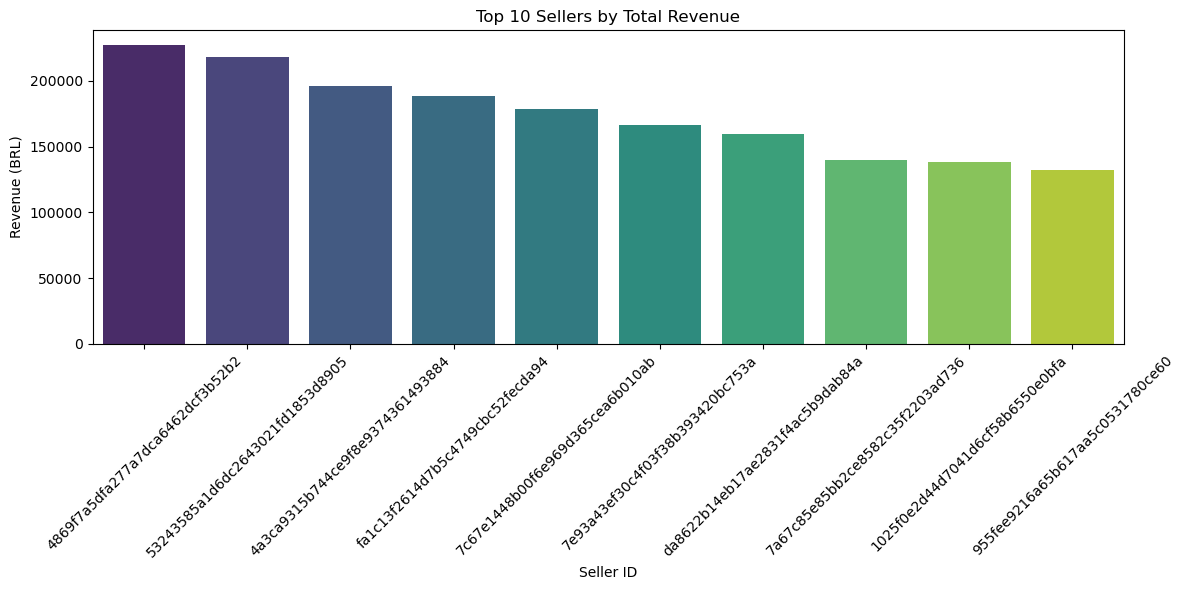

In [4]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_sellers, x='seller_id', y='total_revenue', palette='viridis')
plt.title('Top 10 Sellers by Total Revenue')
plt.ylabel('Revenue (BRL)')
plt.xlabel('Seller ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
# Group by seller_id and calculate delivery performance metrics
seller_delivery = df.groupby('seller_id').agg(
    avg_delay_vs_estimate=('delay_vs_estimate', 'mean'),
    late_delivery_rate=('is_late', 'mean'),
    fast_shipping_rate=('is_fast_shipping', 'mean'),
    total_orders=('order_id', 'nunique')
).reset_index()

# Filter out unreliable (low-volume) sellers
reliable_sellers = seller_delivery[seller_delivery['total_orders'] >= 30]

# View top 10 sellers with highest average delays
slow_sellers = reliable_sellers.sort_values(by='avg_delay_vs_estimate', ascending=False).head(10)
slow_sellers


,seller_id,avg_delay_vs_estimate,late_delivery_rate,fast_shipping_rate,total_orders
469,2a1348e9addc1af5aaa619b1a3679d6b,0.705882,0.294118,0.058824,48
991,54965bbe3e4f07ae045b90b0b8541f52,-2.395062,0.320988,0.000000,73
2731,ede0c03645598cdfc63ca8237acbe73d,-4.191489,0.319149,0.063830,43
1907,a49928bcdf77c55c6d6e05e09a9b4ca5,-4.586538,0.211538,0.067308,96
2404,d13e50eaa47b4cbe9eb81465865d8cfc,-4.808824,0.088235,0.632353,66
2337,cac4c8e7b1ca6252d8f20b2fc1a2e4af,-5.012195,0.182927,0.048780,74
1539,835f0f7810c76831d6c7d24c7a646d4d,-5.666667,0.270833,0.041667,42
2417,d20b021d3efdf267a402c402a48ea64b,-5.843137,0.166667,0.029412,86
1665,8e6d7754bc7e0f22c96d255ebda59eba,-6.294574,0.100775,0.038760,84
2194,bf84056e679dbe9c69929847a40e338f,-6.526316,0.052632,0.157895,35


### 🔎 What This Code Does:

- **Groups** data by `seller_id` and calculates:
  - Average delay vs estimated delivery date
  - % of orders that were delivered late
  - % of orders with fast shipping
  - Total unique orders
- **Filters sellers** with fewer than 30 orders (to avoid outliers or new sellers)
- **Extracts** the 10 sellers with the worst average delays


C:\Users\vrush\AppData\Local\Temp\ipykernel_19848\4048435696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=slow_sellers, x='seller_id', y='avg_delay_vs_estimate', palette='Reds')
C:\Users\vrush\AppData\Local\Temp\ipykernel_19848\4048435696.py:7: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vrush\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


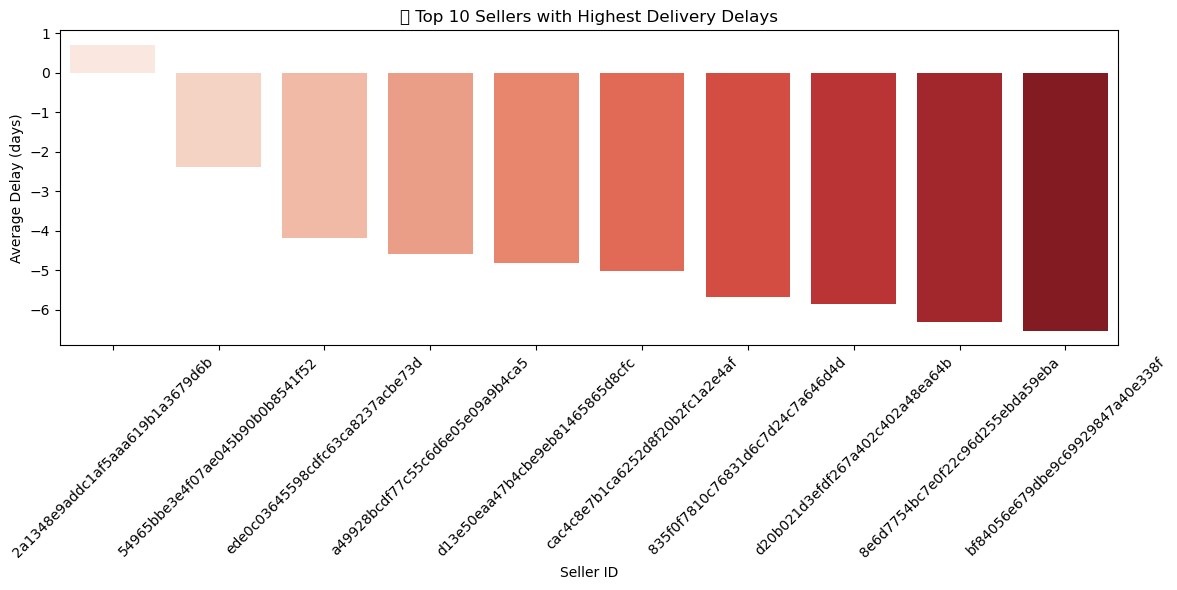

In [7]:
plt.figure(figsize=(12, 6))
sns.barplot(data=slow_sellers, x='seller_id', y='avg_delay_vs_estimate', palette='Reds')
plt.title('🚨 Top 10 Sellers with Highest Delivery Delays')
plt.ylabel('Average Delay (days)')
plt.xlabel('Seller ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📌 Insights:

- These 10 sellers have the **worst average delivery delays** among all sellers with 30+ orders.
- This kind of analysis helps identify **underperforming sellers** that may negatively affect customer experience.
- Next, we’ll check the **top-performing sellers** (those with fastest or most reliable delivery).


## 🚀 Top Performing Sellers (Reliable & Fast Delivery)

Let’s now identify sellers who consistently:
- Deliver **earlier than estimated** (`delay_vs_estimate < 0`)
- Rarely deliver late (`is_late` close to 0)
- Offer **fast shipping** (`is_fast_shipping` close to 1)

We’ll again consider only sellers with at least **30 orders** to avoid unreliable data.


In [8]:
# Sort by fast shipping rate and low delay
fast_sellers = reliable_sellers.sort_values(
    by=['fast_shipping_rate', 'avg_delay_vs_estimate'],
    ascending=[False, True]
).head(10)

fast_sellers


,seller_id,avg_delay_vs_estimate,late_delivery_rate,fast_shipping_rate,total_orders
2404,d13e50eaa47b4cbe9eb81465865d8cfc,-4.808824,0.088235,0.632353,66
2496,d9a84e1403de8da0c3aa531d6d108ba6,-9.948276,0.051724,0.586207,53
1245,6b90f847357d8981edd79a1eb1bf0acb,-9.063830,0.000000,0.574468,45
2451,d566c37fa119d5e66c4e9052e83ee4ea,-10.493151,0.000000,0.506849,65
1786,99a54764c341d5dc80b4a8fac4eba3fb,-10.166667,0.166667,0.500000,44
763,42b729f859728f5079499127a9c2ef37,-7.267176,0.099237,0.488550,103
567,325f3178fb58e2a9778334621eecdbf9,-12.043478,0.000000,0.456522,36
741,40d54b51e962dbe09cabbcfd33298dee,-12.483871,0.000000,0.451613,30
553,30a2f535bb48308f991d0b9ad4a8c4bb,-12.908046,0.034483,0.448276,71
278,18e694e0e48ed6f7aa3f24aade5fd697,-13.411765,0.029412,0.441176,31


C:\Users\vrush\AppData\Local\Temp\ipykernel_19848\2011626115.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fast_sellers, x='seller_id', y='fast_shipping_rate', palette='Greens')
C:\Users\vrush\AppData\Local\Temp\ipykernel_19848\2011626115.py:7: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\vrush\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


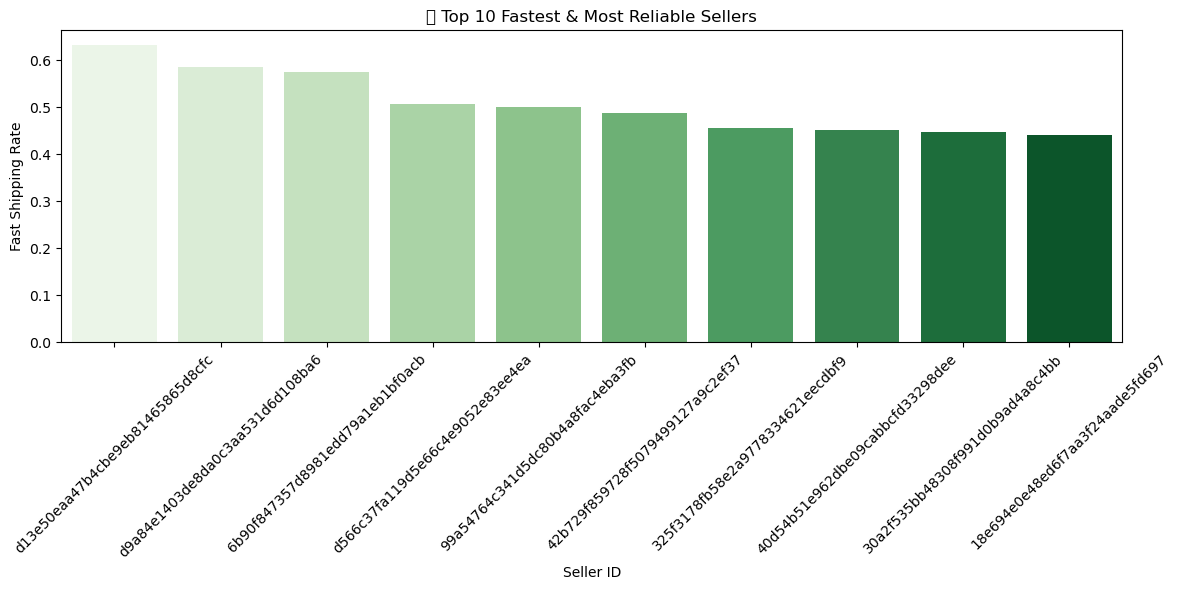

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(data=fast_sellers, x='seller_id', y='fast_shipping_rate', palette='Greens')
plt.title('✅ Top 10 Fastest & Most Reliable Sellers')
plt.ylabel('Fast Shipping Rate')
plt.xlabel('Seller ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 📈 Key Takeaways:

- These sellers consistently deliver before or on time.
- High **fast shipping rate** builds customer trust and satisfaction.
- Marketplace platforms can **highlight or promote** such sellers.

Next, we’ll dive into **volume vs quality trade-off** — i.e., does a high number of orders affect delivery quality?
